# 주가 패턴 검색기

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd
import numpy as np

종목코드="SPY"

data=pdr.get_data_yahoo(종목코드)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-10-20,214.529999,213.110001,213.869995,213.880005,73639800.0,195.287170
2016-10-21,214.080002,212.759995,213.880005,213.979996,89089100.0,195.378433
2016-10-24,215.320007,214.479996,215.000000,214.889999,60146600.0,196.209335
2016-10-25,214.979996,213.979996,214.679993,214.169998,66542300.0,195.551865
2016-10-26,214.419998,212.929993,213.210007,213.740005,75705500.0,195.159302
...,...,...,...,...,...,...
2021-10-13,436.049988,431.540009,434.709991,435.179993,72974000.0,435.179993
2021-10-14,442.660004,438.579987,439.079987,442.500000,70236800.0,442.500000
2021-10-15,446.260010,444.089996,444.750000,445.869995,66226800.0,445.869995


<AxesSubplot:title={'center':'SPY'}, xlabel='Date'>

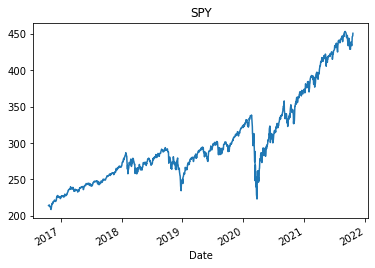

In [2]:
close=data['Close']
close.plot(title=종목코드)

In [3]:
start_date='2021-10-06'
end_date='2021-10-12'

base=close[start_date : end_date]
base.head()

Date
2021-10-06    434.899994
2021-10-07    438.660004
2021-10-08    437.859985
2021-10-11    434.690002
2021-10-12    433.619995
Name: Close, dtype: float64

In [4]:
#base주가 정규화 가장 큰 값이 1, 가장 작은 값이 0이 됨
base_norm = (base - base.min()) / (base.max()-base.min())
base_norm

Date
2021-10-06    0.253968
2021-10-07    1.000000
2021-10-08    0.841266
2021-10-11    0.212303
2021-10-12    0.000000
Name: Close, dtype: float64

In [5]:

window_size = len(base)

#예측 기간
next_date=5

#검색 횟수
moving_cnt = len(close) - window_size - next_date -1


In [6]:
def cosine_similarity(x,y):
    return np.dot(x,y) / (np.sqrt(np.dot(x,x)) * np.sqrt(np.dot(y,y)))

In [7]:
sim_list = []

for i in range(moving_cnt):
    target = close[i:i+window_size]
    
    # Normalize
    target_norm = (target - target.min()) / (target.max() - target.min())
    
    # 코사인 유사도 저장
    cos_similarity = cosine_similarity(base_norm, target_norm)
    
    # 코사인 유사도 <- i(인덱스), 시계열데이터 함께 저장
    sim_list.append(cos_similarity)

sim_list

[0.7862830537872207,
 0.9639299703351262,
 0.789906116408162,
 0.7502285706386375,
 0.8077692989648239,
 0.8667625615911005,
 0.8625821272620435,
 0.6922421139360172,
 0.27817028684104284,
 0.1529576732837106,
 0.3558090667568428,
 0.599167498539095,
 0.5515995142362832,
 0.7674155943939959,
 0.230824261774318,
 0.2040736382715254,
 0.43387119302288846,
 0.6518203957204814,
 0.330450515630204,
 0.4201877167412712,
 0.41622258650292215,
 0.6258108997792311,
 0.5582711015483403,
 0.721995101943794,
 0.8083874996377485,
 0.7538502418056708,
 0.9209496162039132,
 0.4100211380661495,
 0.16580382116581163,
 0.2318565037077116,
 0.3893445212600098,
 0.43769403360364323,
 0.6319676135967778,
 0.45565775790717433,
 0.6530048039534945,
 0.7052351366871722,
 0.8554259446687654,
 0.6612363051409712,
 0.6359499168198746,
 0.35573196786706696,
 0.8020269388347043,
 0.8936782378168523,
 0.3686752672037397,
 0.7391068139241076,
 0.9377225266920947,
 0.8419907977543724,
 0.48585711586105756,
 0.2818329

In [8]:
temp=pd.Series(sim_list).sort_values(ascending=False).head()
simulation=temp.index.tolist()
simulation

[1224, 1094, 441, 98, 884]

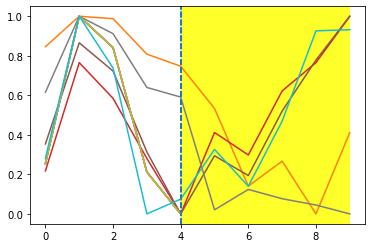

In [9]:
for i in simulation:
    idx=i
    top_ = close[idx:idx+window_size+next_date]
    top_norm = (top_-top_.min()) / (top_.max()-top_.min())

    plt.plot(base_norm.values, label='base')
    plt.plot(top_norm.values, label='target')
    plt.axvline(x=len(base_norm)-1, linestyle='--')
    plt.axvspan(len(base_norm.values)-1, len(top_norm.values)-1, facecolor='yellow', alpha=0.3)
#plt.legend()
plt.show()

In [10]:
class PatternFinder():
    def __init__self(self, period=7):
        self.period = period
        
    def set_stock(self, code: str):
        self.code=code
        self.data=pdr.get_data_yahoo(code)
        self.close = self.data['Close']
        self.change=self.data['Change']
        return self.data
    
    def search(self,start_date, end_date, threshold=0.98):
        
        base = self.close[start_date:end_date]
        self.base_norm = (base-base.min()) / (base.max()-base.min())
        self.base = base
        
        display(base)
        
        window_size = len(base)
        moving_cnt = len(self.data) - window_size - self.period - 1
        cos_sims = self.__cosine_sims(moving_cnt, window_size)
        
        self.window_size = window_size
        cos_sims = cos_sims[cos_sims>threshold]
        return cos_sims
        
        preds = self.change[idx+self.window_size: idx+self.window_size+period]
        display(preds)
        print(f'pred: {preds.mean()*100}%')
        
    def start_prediction(self, result, period=5):
        idx_list = list(result.keys())
        mean_list = []
        for idx in idx_list:
            pred = self.change[idx+self.window_size : idx+self.window_size+period]
            mean_list.append(pred.mean())
            return np.array(mean_list)
            

In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output

!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter serverextension enable voila --sys-prefix



Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Enabling: voila
- Writing config: C:\Users\user\anaconda3\etc\jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?


In [12]:
start_date = widgets.DatePiker(description='시작일')
end_date = widgets.DatePicker(description='종료일')

AttributeError: module 'ipywidgets' has no attribute 'DatePiker'